# Placeholder for Text

In [48]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [49]:
tf.__version__

'2.10.0'

In [50]:
tf.keras.__version__

'2.10.0'

# Data

In [51]:
# pip install import_ipynb
import import_ipynb
#from Data_Cleaning import data_final, data_final_scaled, data_final_scaled_std

import Data_Cleaning as data_cleaned



In [52]:
# Get dataset fromm Data_cleaning
data = data_cleaned.data_final_scaled

### Datasets
# data_final            -> not normalized, not standardized
# data_final_scaled     -> normalized
# data_final_scaled_std -> normalized, standardized


In [53]:
# default/non-default ratio
value_count = data["remainder__loan_status"].value_counts().to_frame()
value_count["pct"] =  value_count["remainder__loan_status"] / value_count["remainder__loan_status"].sum()
value_count

,remainder__loan_status,pct
0.00,318357,0.80
1.00,77672,0.20


In [54]:
n = data.shape[0]
p = round(0.4*n)

data_test = data[data["remainder__loan_status"]==1].sample(40000)

data_test_ = data[data["remainder__loan_status"]==0].sample(60000)
len(data_test)
len(data_test_)

data = data_test.append(data_test_)
data

C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_20780\2912167668.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_test.append(data_test_)


,ohe__term_ 36 months,ohe__term_ 60 months,ohe__emp_length_1 year,ohe__emp_length_10+ years,ohe__emp_length_2 years,ohe__emp_length_3 years,ohe__emp_length_4 years,ohe__emp_length_5 years,ohe__emp_length_6 years,ohe__emp_length_7 years,ohe__emp_length_8 years,ohe__emp_length_9 years,ohe__emp_length_< 1 year,ohe__home_ownership_ANY,ohe__home_ownership_MORTGAGE,ohe__home_ownership_NONE,ohe__home_ownership_OTHER,ohe__home_ownership_OWN,ohe__home_ownership_RENT,ohe__verification_status_Not Verified,ohe__verification_status_Source Verified,ohe__verification_status_Verified,ohe__issue_d_2007,ohe__issue_d_2008,ohe__issue_d_2009,ohe__issue_d_2010,ohe__issue_d_2011,ohe__issue_d_2012,ohe__issue_d_2013,ohe__issue_d_2014,ohe__issue_d_2015,ohe__issue_d_2016,ohe__purpose_car,ohe__purpose_credit_card,ohe__purpose_debt_consolidation,ohe__purpose_educational,ohe__purpose_home_improvement,ohe__purpose_house,ohe__purpose_major_purchase,ohe__purpose_medical,ohe__purpose_moving,ohe__purpose_other,ohe__purpose_renewable_energy,ohe__purpose_small_business,ohe__purpose_vacation,ohe__purpose_wedding,ohe__earliest_cr_line_1944,ohe__earliest_cr_line_1948,ohe__earliest_cr_line_1950,ohe__earliest_cr_line_1951,ohe__earliest_cr_line_1953,ohe__earliest_cr_line_1954,ohe__earliest_cr_line_1955,ohe__earliest_cr_line_1956,ohe__earliest_cr_line_1957,ohe__earliest_cr_line_1958,ohe__earliest_cr_line_1959,ohe__earliest_cr_line_1960,ohe__earliest_cr_line_1961,ohe__earliest_cr_line_1962,ohe__earliest_cr_line_1963,ohe__earliest_cr_line_1964,ohe__earliest_cr_line_1965,ohe__earliest_cr_line_1966,ohe__earliest_cr_line_1967,ohe__earliest_cr_line_1968,ohe__earliest_cr_line_1969,ohe__earliest_cr_line_1970,ohe__earliest_cr_line_1971,ohe__earliest_cr_line_1972,ohe__earliest_cr_line_1973,ohe__earliest_cr_line_1974,ohe__earliest_cr_line_1975,ohe__earliest_cr_line_1976,ohe__earliest_cr_line_1977,ohe__earliest_cr_line_1978,ohe__earliest_cr_line_1979,ohe__earliest_cr_line_1980,ohe__earliest_cr_line_1981,ohe__earliest_cr_line_1982,ohe__earliest_cr_line_1983,ohe__earliest_cr_line_1984,ohe__earliest_cr_line_1985,ohe__earliest_cr_line_1986,ohe__earliest_cr_line_1987,ohe__earliest_cr_line_1988,ohe__earliest_cr_line_1989,ohe__earliest_cr_line_1990,ohe__earliest_cr_line_1991,ohe__earliest_cr_line_1992,ohe__earliest_cr_line_1993,ohe__earliest_cr_line_1994,ohe__earliest_cr_line_1995,ohe__earliest_cr_line_1996,ohe__earliest_cr_line_1997,ohe__earliest_cr_line_1998,ohe__earliest_cr_line_1999,ohe__earliest_cr_line_2000,ohe__earliest_cr_line_2001,ohe__earliest_cr_line_2002,ohe__earliest_cr_line_2003,ohe__earliest_cr_line_2004,ohe__earliest_cr_line_2005,ohe__earliest_cr_line_2006,ohe__earliest_cr_line_2007,ohe__earliest_cr_line_2008,ohe__earliest_cr_line_2009,ohe__earliest_cr_line_2010,ohe__earliest_cr_line_2011,ohe__earliest_cr_line_2012,ohe__earliest_cr_line_2013,ohe__initial_list_status_f,ohe__initial_list_status_w,ohe__application_type_DIRECT_PAY,ohe__application_type_INDIVIDUAL,ohe__application_type_JOINT,ohe__address_AA,ohe__address_AE,ohe__address_AK,ohe__address_AL,ohe__address_AP,ohe__address_AR,ohe__address_AZ,ohe__address_CA,ohe__address_CO,ohe__address_CT,ohe__address_DC,ohe__address_DE,ohe__address_FL,ohe__address_GA,ohe__address_HI,ohe__address_IA,ohe__address_ID,ohe__address_IL,ohe__address_IN,ohe__address_KS,ohe__address_KY,ohe__address_LA,ohe__address_MA,ohe__address_MD,ohe__address_ME,ohe__address_MI,ohe__address_MN,ohe__address_MO,ohe__address_MS,ohe__address_MT,ohe__address_NC,ohe__address_ND,ohe__address_NE,ohe__address_NH,ohe__address_NJ,ohe__address_NM,ohe__address_NV,ohe__address_NY,ohe__address_OH,ohe__address_OK,ohe__address_OR,ohe__address_PA,ohe__address_RI,ohe__address_SC,ohe__address_SD,ohe__address_TN,ohe__address_TX,ohe__address_UT,ohe__address_VA,ohe__address_VT,ohe__address_WA,ohe__address_WI,ohe__address_WV,ohe__address_WY,remainder__loan_amnt,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_a

In [55]:
# Defining the datasets
y = data["remainder__loan_status"]
X = data.drop("remainder__loan_status", axis=1)


In [56]:
# train/test split & keeping defualt/non-default ratio in both datasets
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))
print('Number of variables:', X_train.shape[1])

vc_train = Y_train.value_counts().to_frame()
vc_train["pct"] =  vc_train["remainder__loan_status"] / vc_train["remainder__loan_status"].sum()
display(vc_train)

vc_test = Y_test.value_counts().to_frame()
vc_test["pct"] =  vc_test["remainder__loan_status"] / vc_test["remainder__loan_status"].sum()
display(vc_test)



# StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains 
# approximately the same percentage of samples of each target class as the complete set.
# keep the proportion of y values through the training and test sets, then pass stratify=y -> else we have imbalanced datasets

Training set size: 80000
Testing set size: 20000
Number of variables: 182


,remainder__loan_status,pct
0.00,48033,0.60
1.00,31967,0.40


,remainder__loan_status,pct
0.00,11967,0.60
1.00,8033,0.40


In [57]:
# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# print('Training set size:', len(train_set))
# print('Testing set size:', len(test_set))

In [58]:
# #Defining the datasets
# Y_train = train_set["remainder__loan_status"]
# X_train = train_set.drop("remainder__loan_status", axis=1)
# Y_test = test_set["remainder__loan_status"]
# X_test = test_set.drop("remainder__loan_status", axis=1)

## Models (Remo)

In [59]:
# Basic Model
model1 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(256, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(32, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

In [60]:
# Model with regularizers and Dropout layers
model2 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(182, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

In [61]:
model1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # 0.01 < 0.02 
              metrics=["accuracy"])

# Hyperparameter tuning for learning rate?

In [62]:
model2.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [63]:
model1.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

# best with data_final_scaled

Epoch 1/5
800/800 [==============================] - 5s 5ms/step - loss: 0.6435 - accuracy: 0.6335 - val_loss: 0.6293 - val_accuracy: 0.6485
Epoch 2/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6211 - accuracy: 0.6576 - val_loss: 0.6181 - val_accuracy: 0.6582
Epoch 3/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6126 - accuracy: 0.6649 - val_loss: 0.6125 - val_accuracy: 0.6645
Epoch 4/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6078 - accuracy: 0.6686 - val_loss: 0.6088 - val_accuracy: 0.6664
Epoch 5/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6050 - accuracy: 0.6707 - val_loss: 0.6072 - val_accuracy: 0.6681


In [64]:
model2.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

Epoch 1/5
800/800 [==============================] - 4s 5ms/step - loss: 0.7108 - accuracy: 0.6002 - val_loss: 0.6747 - val_accuracy: 0.5983
Epoch 2/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6739 - accuracy: 0.6004 - val_loss: 0.6737 - val_accuracy: 0.5983
Epoch 3/5
800/800 [==============================] - 3s 4ms/step - loss: 0.6730 - accuracy: 0.6004 - val_loss: 0.6738 - val_accuracy: 0.5983
Epoch 4/5
800/800 [==============================] - 4s 5ms/step - loss: 0.6730 - accuracy: 0.6004 - val_loss: 0.6740 - val_accuracy: 0.5983
Epoch 5/5
800/800 [==============================] - 4s 4ms/step - loss: 0.6730 - accuracy: 0.6004 - val_loss: 0.6741 - val_accuracy: 0.5983


In [65]:
model1.evaluate(X_test, Y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.6072 - accuracy: 0.6681


[0.6071586608886719, 0.6680999994277954]

In [66]:
model2.evaluate(X_test, Y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.6741 - accuracy: 0.5983


[0.6741078495979309, 0.5983499884605408]

## Models (Lorena)

In [67]:
# Model with regularizers and Dropout layers
model3 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(182, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)), # relu, sigmoid, tanh, prelu, elu, softmax
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])


In [68]:
model3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01), # SGD, Adam
              metrics=["accuracy"])

In [69]:
model3.fit(X_train, Y_train, batch_size=100, epochs=5, 
                    validation_data=(X_test, Y_test))

model3.summary()

Epoch 1/5
800/800 [==============================] - 4s 5ms/step - loss: 3.9585 - accuracy: 0.5772 - val_loss: 3.4470 - val_accuracy: 0.5983
Epoch 2/5
800/800 [==============================] - 4s 4ms/step - loss: 3.0477 - accuracy: 0.6005 - val_loss: 2.6839 - val_accuracy: 0.5983
Epoch 3/5
800/800 [==============================] - 3s 4ms/step - loss: 2.3944 - accuracy: 0.6004 - val_loss: 2.1302 - val_accuracy: 0.5983
Epoch 4/5
800/800 [==============================] - 3s 4ms/step - loss: 1.9200 - accuracy: 0.6004 - val_loss: 1.7270 - val_accuracy: 0.5983
Epoch 5/5
800/800 [==============================] - 4s 5ms/step - loss: 1.5757 - accuracy: 0.6005 - val_loss: 1.4333 - val_accuracy: 0.5983
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (100, 182)                33306     
                                                                 
 dropout_

### Comparison Models
Basic Regressions:
* Logistic Regression

ML comparable algos:
* XGBoost

Compare confusion matrix, ROC, PRC, AUC


## Performance Metrics

**Precision, Recall, F1-Score:** \
 In credit risk management the cost of misclassification of a 'defaulted applicant' as 'non defaulted' is very high and may cause significant loss of money for the financial institution. Therefore, we need to significantly reduce the probability of approving a defaulted applicatn (False Negative (type 2 error)). Therefore, Recall is more important metric in this project due to the high risk of losing money. Low precision might result in losing of a customer (False Positive), but not harm the business drastically. I also have presented F1-score that considers both precision and recall. However, when we are dealing with an imbalanced dataset such as in our case, if we don't balance positive and negative labels, we need to be careful a proper threshold for the classifier, different from the 0.5 (0.09 could be a good choice in this problem since positive/negtative labels volume equals to 0.09 in the training dataset).

 **Area Under ROC Curve (AUC):**\
  If we use original imbalanced dataset, ROC Curve is the appropriate metric to visualize the performance of binary classifier and Area under ROC (AUC) is the best way to summarize the classifier performance in just one number. In this way, the True positive rate and False positive rate for different threshold is presented and area under this curve is the AUC.

**Cohen's kappa:**\
 is a more conservative metric that is used in industry as a performance metric of a classifier. Cohen’s kappa is a measure of the agreement between two raters and is between 0 to 1 . Cohen’s kappa of 1 indicates perfect agreement between the raters and 0 indicates that any agreement is totally due to chance.

 https://github.com/ali-ghorbani-k/Credit-Risk-Management 


In [70]:
model = model1

625/625 [==============================] - 1s 2ms/step
[[9907 2060]
 [4578 3455]]


0.6681

<AxesSubplot: >

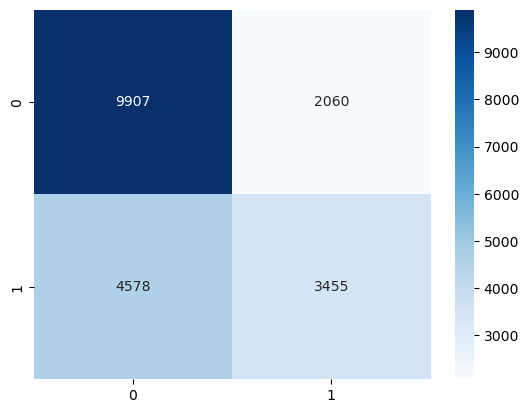

In [71]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

# Measuring Accuracy of our Model
cm = confusion_matrix(Y_test, y_prediction)
print(cm)
display(accuracy_score(Y_test, y_prediction))

# Assign confusion matrix values to variables 
TP = cm[1, 1] # True positives 
TN = cm[0, 0] # True negatives 
FP = cm[0, 1] # False positives
FN = cm[1, 0] # False negatives

sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')

In [72]:
# Score
# Fraction of (overall) correctly predicted classes
print("Score: ", accuracy_score(Y_test , y_prediction))

# Precision 
# Accuracy of a positive (’default’) prediction. 
# ”When a positive value is predicted, how often is the prediction correct?”
print("Precision: ", precision_score(Y_test , y_prediction))

# Specificity
# Fraction of correctly predicted ’positives’ (e.g. ’defaults’)
# ”When the actual value is positive, how often is the prediction correct?”
print("Specificity: ", TN / (TN + FP))

# Recall (Sensitivity)
# Fraction of correctly predicted ’positives’ (e.g. ’defaults’)
#  ”When the actual value is positive, how often is the prediction correct?”
print("Recall: ", recall_score(Y_test , y_prediction))

# F Score
# Evaluate the accuracy of predictions in two-class (binary) classification problems
# It combines Precision and Recall (aka Sensitivity) in one metric and tells us something about the relations between data’s positive labels and those given by a classifier
print("F-Score: ", f1_score(Y_test , y_prediction))

# Classification Report
print(classification_report(Y_test , y_prediction))

Score:  0.6681
Precision:  0.6264732547597461
Specificity:  0.8278599481908582
Recall:  0.43010083405950456
F-Score:  0.5100383820490109
              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75     11967
         1.0       0.63      0.43      0.51      8033

    accuracy                           0.67     20000
   macro avg       0.66      0.63      0.63     20000
weighted avg       0.66      0.67      0.65     20000



AUC:  0.6427370444096254


Text(0.5, 1.0, '2-class Precision-Recall curve: \n AUC=0.64')

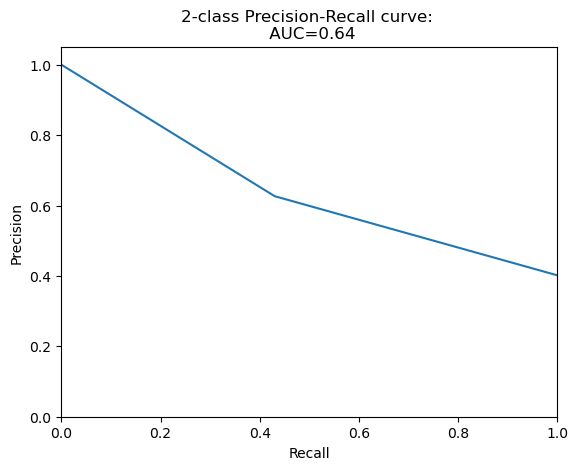

In [73]:
## Precision-Recall Curve 
# How precision and recall varies given different level of thresholds
precision, recall, threshold = precision_recall_curve(Y_test , y_prediction)

## AUC
# The bigger the AUC, the better the classifier
prec_recall_auc = auc(recall , precision)
print("AUC: ", prec_recall_auc)

#Plot Precision/Recall variations given different levels of thresholds 
plt.plot(recall , precision)
plt.xlabel("Recall") 
plt.ylabel("Precision") 
plt.ylim([0.0 , 1.05]) 
plt.xlim([0.0 , 1.0]) 
plt.title("2-class Precision-Recall curve: \n AUC={0:0.2f}".format(prec_recall_auc))
#plt.title("Precision-Recall Curve")




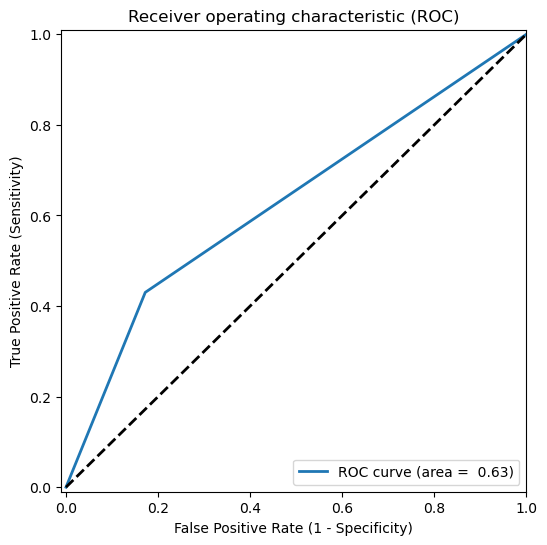

In [74]:
## ROC Curve
# Relationship between sensitivity and specificity of a binary classifier
# The ROC curve serves to visualize a variation of that trade-off. It varies the cut-off threshold from 0 to 1 and calculates 
# for each threshold the true positive rate (aka sensitivity) and false positive rate (equals 1 - specificity)
fpr, tpr, thresholds = roc_curve(Y_test, y_prediction)
roc_auc = auc(fpr , tpr)

plt.figure(figsize =(6, 6)) 
plt.plot(fpr, tpr , lw=2, label="ROC curve (area = {0: 0.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c = "k", linestyle="--") 
plt.xlim([-0.01, 1.0]) 
plt.ylim([-0.01, 1.01]) 
plt.xlabel("False Positive Rate (1 - Specificity)") 
plt.ylabel("True Positive Rate (Sensitivity)") 
plt.title("Receiver operating characteristic (ROC)", fontsize=12)
plt.legend(loc="lower right")